## Introduction to Simple Moving Average (SMA) Trading Strategy

The Simple Moving Average (SMA) is one of the most widely used and simplest technical indicators in trading and investing. It is a trend-following indicator that helps traders identify potential entry and exit points in the financial markets.

The SMA trading strategy is based on the calculation of the average price of an asset over a specified period. The SMA is calculated by summing up the closing prices of the asset over the selected period and then dividing it by the number of data points in that period. This moving average "smooths" the price data, making it easier to identify trends.

The strategy works on the premise that when the current price of an asset crosses above its SMA, it may signal a potential uptrend, indicating a "Buy" signal. Conversely, when the current price crosses below its SMA, it may indicate a potential downtrend, signaling a "Sell" signal.

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### Input data

In [25]:
# Define input function
def get_user_input():
    ticker = input("Ticker symbol: ")
    start_date = input("Start date: ")
    return ticker, start_date

def main():
    ticker, start_date = get_user_input()
    print("You entered:")
    print("Ticker:", ticker)
    print("Start date:", start_date)

    # Download data using yfinance
    df = yf.download(ticker, start=start_date)
    print("Data downloaded successfully!")

if __name__ == "__main__":
    main()

Ticker symbol: GLD
Start date: 2019-01-01
You entered:
Ticker: GLD
Start date: 2019-01-01
[*********************100%***********************]  1 of 1 completed
Data downloaded successfully!


### Calculating Moving Averages

In [32]:
# Create MA columns
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()
df = df.dropna()
df

<ipython-input-32-4e40cb0906bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA20'] = df['Adj Close'].rolling(20).mean()
<ipython-input-32-4e40cb0906bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA50'] = df['Adj Close'].rolling(50).mean()


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-08-01,53.474998,54.507500,51.685001,52.107498,50.555878,216071600,49.899762,47.700800
2019-08-02,51.382500,51.607498,50.407501,51.005001,49.486206,163448400,49.897215,47.803838
2019-08-05,49.497501,49.662498,48.145000,48.334999,46.895714,209572000,49.816201,47.870201
2019-08-06,49.077499,49.517502,48.509998,49.250000,47.783463,143299200,49.764779,47.957667
2019-08-07,48.852501,49.889999,48.455002,49.759998,48.278271,133457600,49.713963,48.058618
...,...,...,...,...,...,...,...,...
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200,189.083500,181.372093
2023-07-18,193.350006,194.330002,192.419998,193.729996,193.729996,48353800,189.524000,181.935473
2023-07-19,193.100006,198.229996,192.649994,195.100006,195.100006,80507300,190.028500,182.370868


In [37]:
df = df[['Adj Close','MA20', 'MA50']]
df

,Adj Close,MA20,MA50
Date,,,
2019-08-01,50.555878,49.899762,47.700800
2019-08-02,49.486206,49.897215,47.803838
2019-08-05,46.895714,49.816201,47.870201
2019-08-06,47.783463,49.764779,47.957667
2019-08-07,48.278271,49.713963,48.058618
...,...,...,...
2023-07-17,193.990005,189.083500,181.372093
2023-07-18,193.729996,189.524000,181.935473
2023-07-19,195.100006,190.028500,182.370868


### Calculating Signals

In [76]:
# Create Buy, Sell signals
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i]     and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i]     and df.MA20.iloc[i-1] > df.MA50.iloc[i]:
        Sell.append(i)

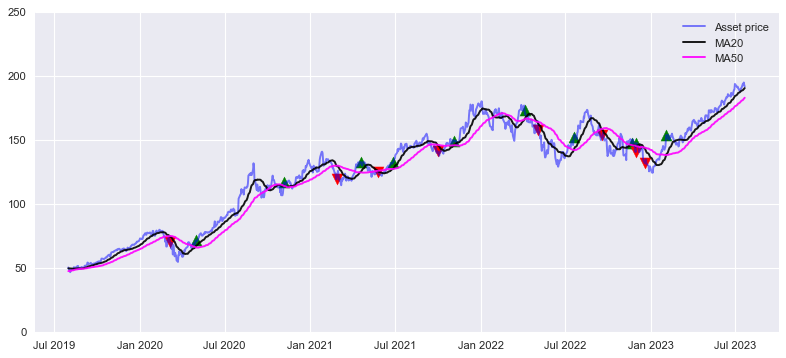

In [79]:
# Find common indices between Buy and Sell
common_indices = set(Buy).intersection(set(Sell))

# Plot the data
plt.style.use('seaborn')
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k', alpha=0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker='v', color='r', s=100)
plt.legend()
plt.show()